In [1]:
import pandas as pd

In [2]:
set_cm = set()
set_cpt = set()
set_rejected = set()

In [3]:
df = pd.read_excel('/home/trishalaswain/Downloads/SCP-3035-OSF ST. FRANCIS HOSPITAL & MEDICAL GROUP-2023-04-01-2023-04-15.xlsx',index_col = False)

In [4]:
def clean_em(x):
    x['EANDM_Rejected'] = str(x['EANDM_Rejected']).replace('[','').replace(']','')
    
    clean = str(x['EANDM_Rejected']).split(', ')
    for i in clean:
        set_rejected.add(i)
    return clean

rejected = df.apply(clean_em, axis=1)
set_rejected.remove('')

In [5]:
def get_em_counts(code_list, df_to_use, col, codetype):
    count_dict = {}
    for code in code_list:
        count_dict[code+'_'+codetype] = df_to_use[col].str.contains(code).sum()
        # count_dict[code] = df_to_use[col].str.contains(code).sum()
        
    return count_dict

In [6]:
count_dict_em_rejected = get_em_counts(set_rejected, df, 'EANDM_Rejected', 'EANDM_Rejected')

In [7]:
count_dict_em_rejected

{'99291_EANDM_Rejected': 130,
 '99285_EANDM_Rejected': 103,
 '99281_EANDM_Rejected': 2,
 '99292_EANDM_Rejected': 8,
 '99283_EANDM_Rejected': 1,
 '99282_EANDM_Rejected': 4,
 '99284_EANDM_Rejected': 22}

In [8]:
count_dict_em_final = get_em_counts(set_rejected, df, 'EANDM_Final', 'EANDM_Final')

In [10]:
count_dict_em_final

{'99291_EANDM_Final': 49,
 '99285_EANDM_Final': 256,
 '99281_EANDM_Final': 0,
 '99292_EANDM_Final': 2,
 '99283_EANDM_Final': 14,
 '99282_EANDM_Final': 1,
 '99284_EANDM_Final': 248}

In [11]:
# var = input()
df = df.loc[df['EANDM_Rejected'].str.contains('99202')]

In [12]:
def get_counts(code_list, df_to_use, col, codetype):
    count_dict = {}
    for code in code_list:
        count_dict[code] = df_to_use[col].str.contains(code).sum()
        
    return count_dict


In [13]:
def clean_cm(x):
    x['CM_Final'] = str(x['CM_Final']).replace('[','')
    x['CM_Final'] = str(x['CM_Final']).replace(']','')
    clean = str(x['CM_Final']).split(', ')
    for i in clean:
        set_cm.add(i)
    return clean
cm_code_list = set_cm
clean_cm = df.apply(clean_cm, axis=1)

In [14]:
def clean_cpt(x):
    
    clean = str(x['CPT_Final']).split(', ')
    for i in clean:
        set_cpt.add(i)
    return clean
cpt_code_list = set_cpt
clean_cpt = df.apply(clean_cpt, axis=1)

In [16]:
count_dict_cm = get_counts(cm_code_list, df, 'CM_Final', 'CM_Final')

In [17]:
cm_stats = pd.DataFrame(count_dict_cm.items(), columns = ['cm_code','code_counts'])

In [18]:
cm_stats = cm_stats.sort_values(by=['code_counts'], ascending=False).reset_index()

In [19]:
cm_stats.drop('index', axis=1, inplace=True)

In [20]:
cm_stats

,cm_code,code_counts


In [21]:
count_dict_cpt = get_counts(cpt_code_list, df, 'CPT_Final', 'CPT_Final')

In [22]:
cpt_stats = pd.DataFrame(count_dict_cpt.items(), columns = ['cpt_code','code_counts'])

In [23]:
cpt_stats = cpt_stats.sort_values(by=['code_counts'], ascending=False).reset_index()

In [24]:
cpt_stats.drop('index', axis=1, inplace=True)

In [25]:
cpt_stats

,cpt_code,code_counts


In [26]:
import numpy

In [27]:
actual = numpy.random.binomial(1, 0.9, size = 1000)

In [28]:
predicted = numpy.random.binomial(1, 0.9, size = 1000)

In [29]:
from sklearn import metrics

In [30]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [31]:
confusion_matrix

array([[ 19,  80],
       [ 92, 809]])

In [32]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [33]:
cm_display

In [34]:
import matplotlib.pyplot as plt

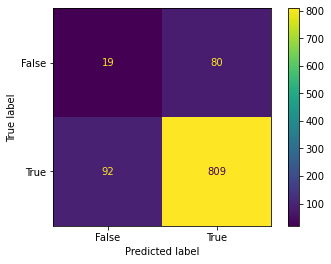

In [35]:
cm_display.plot()
plt.show()